In [4]:
import numpy as np
import random as rnd
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [5]:
def inicializarIndividuo(individuo):
    total = 1.0
    cantidadGenes = len(individuo)
    for counter in range(cantidadGenes):
        individuo[counter] = rnd.randint(1, 8)
    return individuo

def generarPoblacion(cantidadDeIndividuos, cantidadDeGenes):
    poblacion = np.zeros((cantidadDeIndividuos, cantidadDeGenes))
    for counter in range(0, cantidadDeIndividuos):
        poblacion[counter] = inicializarIndividuo(poblacion[counter])
    return poblacion

In [6]:
def cruzarIndividuos(individuo1, individuo2):
    crossPoint = rnd.randint(1, len(individuo1) - 2)
    hijo1 = np.append(individuo1[0:crossPoint], individuo2[crossPoint:len(individuo1)])
    hijo2 = np.append(individuo2[0:crossPoint], individuo1[crossPoint:len(individuo1)])
    return np.array([hijo1, hijo2])

def cruzarPoblacion(poblacion, probabilidadDeCruza):    
    nuevaPoblacion = None
    for counter in range(len(poblacion)):
        probabilidad = rnd.random()
        if(probabilidad < probabilidadDeCruza):
            pareja = rnd.randint(0, len(poblacion) - 2)
            while pareja == counter:
                pareja = rnd.randint(0, len(poblacion) - 2)
            
            nuevosIndividuos = cruzarIndividuos(poblacion[counter], poblacion[pareja])
            
            if nuevaPoblacion is None:
                nuevaPoblacion = nuevosIndividuos
            else:
                nuevaPoblacion = np.concatenate((nuevaPoblacion, nuevosIndividuos))
                
    if not nuevaPoblacion is None:
        poblacion = np.concatenate((poblacion, nuevaPoblacion))
    return poblacion

In [7]:
def mutacion(individuo):
    mutationPoint = rnd.randint(1, len(individuo) -  2)
    mutationValue = rnd.randint(1, 3)
    individuoMutante = np.array(individuo, copy=True)
    individuoMutante[mutationPoint] += mutationValue
    #individuoMutante = ajustarIndividuo(individuoMutante)
    return np.array([individuoMutante])

def mutarPoblacion(poblacion, probabilidadDeMutacion):
    nuevaPoblacion = None
    for counter in range(len(poblacion)):
        probabilidad = rnd.random()
        if(probabilidad < probabilidadDeMutacion):
            nuevoMutante = mutacion(poblacion[counter])
            if nuevaPoblacion is None:
                nuevaPoblacion = nuevoMutante
            else:
                nuevaPoblacion = np.concatenate((nuevaPoblacion, nuevoMutante))
    if not nuevaPoblacion is None:        
        poblacion = np.concatenate((poblacion, nuevaPoblacion))
    return poblacion

In [8]:
def evaluacion(poblacion, x_train, y_train, x_test, y_test):
    puntaje = np.zeros(poblacion.shape[0])
    
    for counter in range(poblacion.shape[0]):
        redNeuronal = MLPClassifier(hidden_layer_sizes=(int(poblacion[counter][0]),
                                                    int(poblacion[counter][1]),
                                                    int(poblacion[counter][2]),
                                                    int(poblacion[counter][3])),
                                    max_iter=100, activation ='logistic', tol= 1e-7)

        redNeuronal.fit(x_train, y_train)
        puntaje[counter] = redNeuronal.score(x_test, y_test)
        
    print("Entrenamientos completados!")    
    ordenDeMayorAMenor = np.argsort(-puntaje)
    poblacionOrdenada = poblacion[ordenDeMayorAMenor]
    mejorPuntaje = (np.sort(-puntaje)[0]) * -1
    return poblacionOrdenada, mejorPuntaje, (np.sort(-puntaje)) * -1

def eliminarIndividuosPorCantidad(poblacion, cantidadAMantener):    
    return poblacion[:cantidadAMantener]

Poblacion original:
[[6. 7. 4. 1.]
 [3. 6. 4. 3.]
 [3. 5. 8. 4.]
 [1. 2. 6. 3.]
 [7. 2. 6. 2.]
 [2. 6. 2. 4.]
 [2. 2. 4. 8.]
 [4. 4. 8. 5.]
 [7. 4. 3. 3.]
 [6. 4. 6. 3.]]


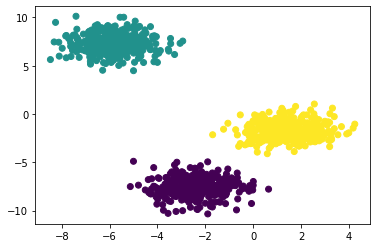

In [9]:
poblacion = generarPoblacion(10, 4)
print("Poblacion original:")
print(poblacion)

x, y = make_blobs(n_samples=1000, centers=3, n_features=10)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

totalGeneraciones = 50
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [10]:
for generacion in range (0, totalGeneraciones):
    poblacion = cruzarPoblacion(poblacion, 0.3)
    poblacion = mutarPoblacion(poblacion, 0.3)
    poblacion, mejorPuntaje, puntajes = evaluacion(poblacion, x_train, y_train, x_test, y_test)
    poblacion = eliminarIndividuosPorCantidad(poblacion, 5)
    print("Mejor puntaje de la generación " + str(generacion) + ":" + str(mejorPuntaje))
    print("Puntajes: " + str(puntajes))
    if(mejorPuntaje == 1):
        break
    
print("Solución: " + str(poblacion[0]))

Entrenamientos completados!
Mejor puntaje de la generación 0:0.6575
Puntajes: [0.6575 0.6575 0.64   0.64   0.64   0.2975 0.2975 0.2975 0.2975 0.2975
 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975
 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 1:0.64
Puntajes: [0.64   0.5125 0.3425 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 2:0.6575
Puntajes: [0.6575 0.6575 0.3425 0.2975 0.2975 0.2975 0.2975 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 3:0.64
Puntajes: [0.64   0.64   0.64   0.2975 0.2975 0.2975 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 4:0.6575
Puntajes: [0.6575 0.6575 0.6    0.2975 0.2975 0.2975 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 5:0.65
Puntajes: [0.65   0.64   0.64   0.64   0.64   0.64   0.36   0.2975 0.2975 0.2975
 0.2975 0.2975]
Entrenamientos completados!
Mejor puntaje de la generación 6:0.6575


In [11]:
redNeuronalNueva = MLPClassifier(hidden_layer_sizes=(6, 9, 11, 4), max_iter=500, activation ='logistic', tol= 1e-8)
redNeuronalNueva.fit(x_train, y_train)
print("Score (accuracy): " + str(redNeuronalNueva.score(x_test, y_test)))

Score (accuracy): 1.0
